In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy as sc
import sympy as sm
from sklearn import linear_model as lm
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector 
import warnings
warnings.filterwarnings("ignore")
def var(x):
    return np.sum((x-np.mean(x))**2)/(len(x)-1)
def std(x):
    return np.sqrt(np.sum((x-np.mean(x))**2)/(len(x)-1))
def cov(x,y):
    return 1/(len(x)-1)*np.sum((x-np.mean(x))*(y-np.mean(y)))
def regress(x,y):
    n=len(y)
    model=lm.LinearRegression()
    model=model.fit(x,y)
    b=np.empty(1+len(model.coef_))
    b[0]=model.intercept_
    b[1::]=model.coef_
    X=np.insert(X,0,np.ones(len(x)),axis=1)
    ys=X@b
    e=y-ys
    return b

In [2]:
print('We try to make an one-week prediction into the future from covid data in europe')

We try to make an one-week prediction into the future from covid data in europe


In [3]:
#Reading the data and selecting data for Europe
d=pd.read_excel("C:\\Users\\petro\\Desktop\\cov.xlsx")
data=d[d.continentExp=='Europe']
data=data.drop(['countriesAndTerritories', 'geoId', 'countryterritoryCode','continentExp','popData2019','Cumulative_number_for_14_days_of_COVID19_cases_per_100000'],axis=1)

In [4]:
#selecting columns
data2=pd.DataFrame(columns=['day','month','year','cases','deaths'])

In [5]:
#creating total amount of data per single day
uyear=np.unique(d.year)
for i in range(len(uyear)):
    year=uyear[i]
    umonths=np.unique(d.month[d.year==year])
    for j in range(len(umonths)):
        month=umonths[j]
        udays=np.unique(d.day[(d.month==month) & (d.year==year)])
        for k in range(len(udays)):
            day=udays[k]
            data2.loc[len(data2)]=[day,month,year,np.sum(data.cases[(data.day==day) & (data.month==month) & (data.year==year)]),np.sum(data.deaths[(data.day==day) & (data.month==month) & (data.year==year)])]


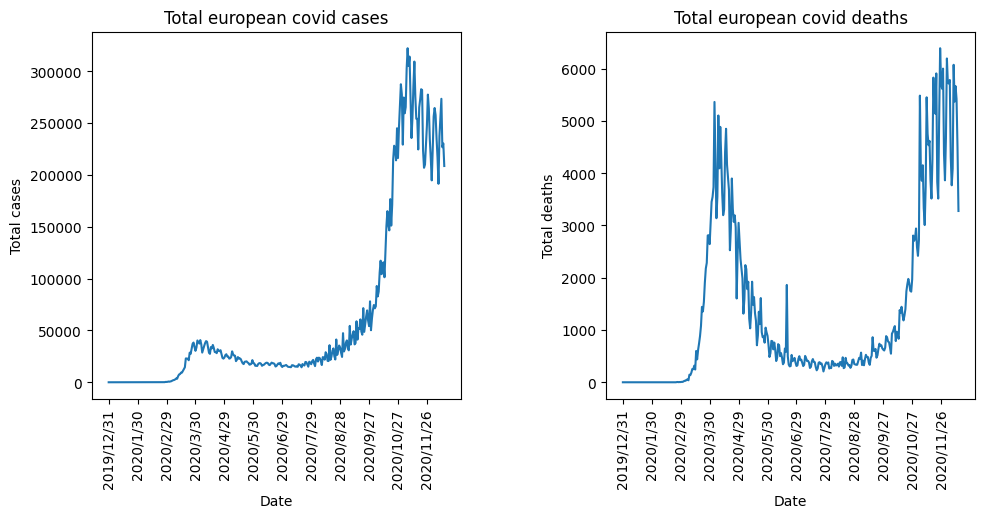


As the scatter shows deaths and cases do not correlate linear.
There are other factors that influence the death variable like 
medicines, softer covid variation ech. 
A regression model shouldn't be a good choice.


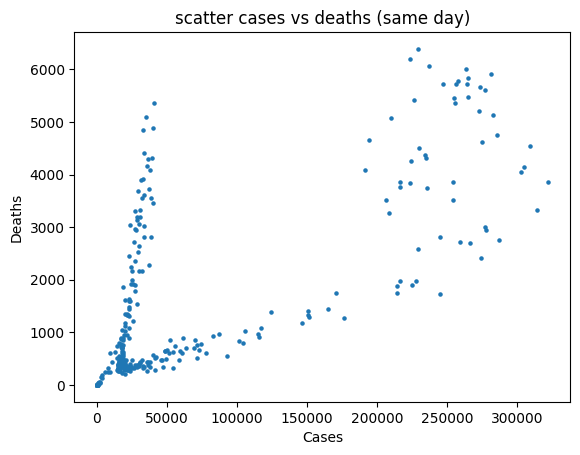

In [6]:
#ploting the data per day
d=data2[['day','month','year']]
d=pd.to_datetime(d)
data2['Datetime']=d

ind=data2.index[(data2.deaths<0)|(data2.cases<0)]
data2=data2.drop(ind)

cases=data2.cases.to_numpy()
deaths=data2.deaths.to_numpy()
dates=pd.to_datetime(data2.Datetime)


fig,ax=plt.subplots(1,2)
fig.tight_layout(pad=3.0)
fig.set_figwidth(11) 
ax[0].plot(cases)
ax[1].plot(deaths)
ax[0].set_title('Total european covid cases');
ax[0].set_ylabel('Total cases');
ax[0].set_xlabel('Date');
ax[1].set_title('Total european covid deaths');
ax[1].set_ylabel('Total deaths');
ax[1].set_xlabel('Date');
ticks=[]
for i,j in enumerate(dates):
    ticks.append(str(str(j.year)+'/'+str(j.month)+'/'+str(j.day)))
ind=np.arange(0,len(d),30)
ax[0].set_xticks(ind);
ax[0].set_xticklabels(ticks[0:len(d):30],rotation=90);
ax[1].set_xticks(ind)
ax[1].set_xticklabels(ticks[0:len(d):30],rotation=90);
plt.show()
ind=cases.argsort()
fig2=plt.figure;
plt.scatter(cases[ind],deaths[ind],s=5);
plt.title('scatter cases vs deaths (same day)');
plt.xlabel('Cases');
plt.ylabel('Deaths');

print('\nAs the scatter shows deaths and cases do not correlate linear.\nThere are other factors that influence the death variable like \nmedicines, softer covid variation ech. \nA regression model shouldn\'t be a good choice.')

Does not seem to exist any linear model between cases and deaths for any time difference


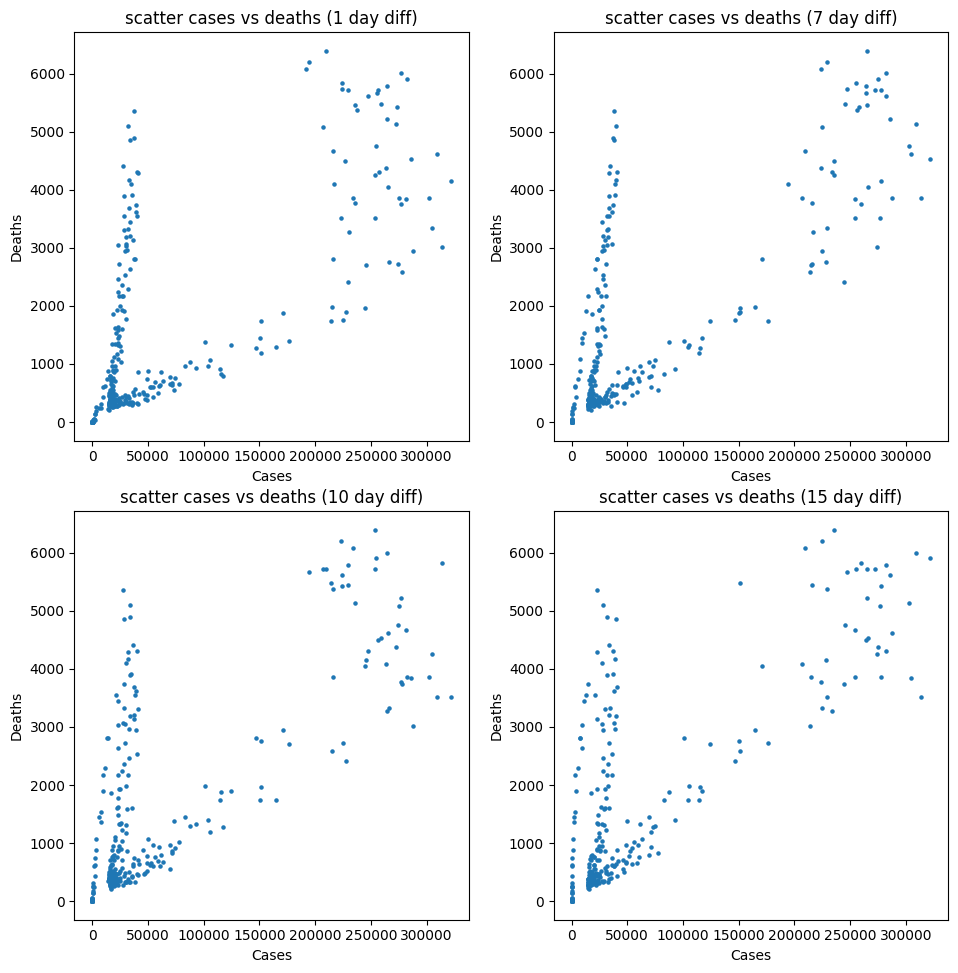

In [7]:
fig3,ax=plt.subplots(2,2)
fig3.set_figwidth(10)
fig3.set_figheight(10)
fig3.tight_layout(pad=3.0)

n=len(cases)
cases1daybefore=cases[0:n-1]
deathsforcases1daybefore=deaths[1:]
ind=cases1daybefore.argsort()
ax[0,0].scatter(cases1daybefore[ind],deathsforcases1daybefore[ind],s=5);
ax[0,0].set_title('scatter cases vs deaths (1 day diff)');
ax[0,0].set_xlabel('Cases');
ax[0,0].set_ylabel('Deaths');

cases7daysbefore=cases[0:n-7]
deathsforcases7daysbefore=deaths[7:]
ind=cases7daysbefore.argsort()
ax[0,1].scatter(cases7daysbefore[ind],deathsforcases7daysbefore[ind],s=5);
ax[0,1].set_title('scatter cases vs deaths (7 day diff)');
ax[0,1].set_xlabel('Cases');
ax[0,1].set_ylabel('Deaths');

cases10daysbefore=cases[0:n-10]
deathsforcases10daysbefore=deaths[10:]
ind=cases10daysbefore.argsort()
ax[1,0].scatter(cases10daysbefore[ind],deathsforcases10daysbefore[ind],s=5);
ax[1,0].set_title('scatter cases vs deaths (10 day diff)');
ax[1,0].set_xlabel('Cases');
ax[1,0].set_ylabel('Deaths');


cases15daysbefore=cases[0:n-15]
deathsforcases15daysbefore=deaths[15:]
ind=cases15daysbefore.argsort()
ax[1,1].scatter(cases15daysbefore[ind],deathsforcases15daysbefore[ind],s=5);
ax[1,1].set_title('scatter cases vs deaths (15 day diff)');
ax[1,1].set_xlabel('Cases');
ax[1,1].set_ylabel('Deaths');

print('Does not seem to exist any linear model between cases and deaths for any time difference')


Does not seem to exist any linear model between cases and deaths for any time difference


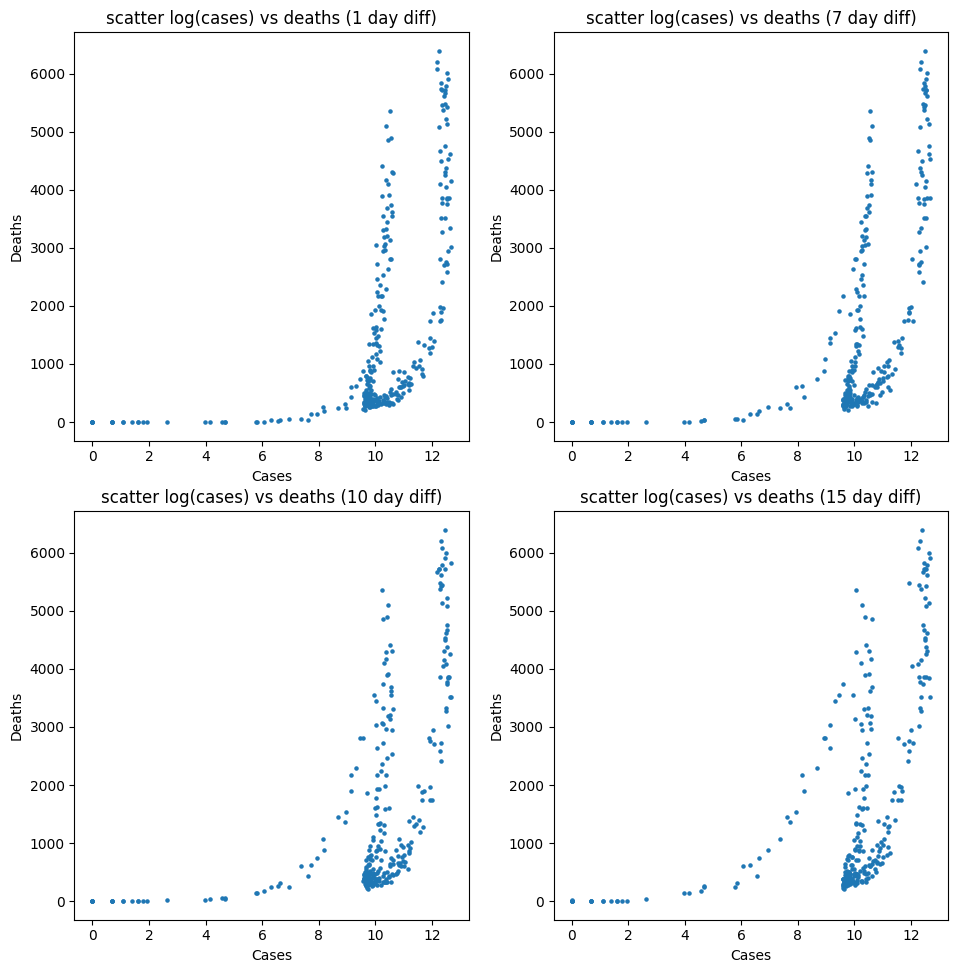

In [8]:
fig4,ax=plt.subplots(2,2)
fig4.set_figwidth(10)
fig4.set_figheight(10)
fig4.tight_layout(pad=3.0)

n=len(cases)
cases1daybefore=np.log(cases[0:n-1])
deathsforcases1daybefore=deaths[1:]
ind=cases1daybefore.argsort()
ax[0,0].scatter(cases1daybefore[ind],deathsforcases1daybefore[ind],s=5);
ax[0,0].set_title('scatter log(cases) vs deaths (1 day diff)');
ax[0,0].set_xlabel('Cases');
ax[0,0].set_ylabel('Deaths');

cases7daysbefore=np.log(cases[0:n-7])
deathsforcases7daysbefore=deaths[7:]
ind=cases7daysbefore.argsort()
ax[0,1].scatter(cases7daysbefore[ind],deathsforcases7daysbefore[ind],s=5);
ax[0,1].set_title('scatter log(cases) vs deaths (7 day diff)');
ax[0,1].set_xlabel('Cases');
ax[0,1].set_ylabel('Deaths');

cases10daysbefore=np.log(cases[0:n-10])
deathsforcases10daysbefore=deaths[10:]
ind=cases10daysbefore.argsort()
ax[1,0].scatter(cases10daysbefore[ind],deathsforcases10daysbefore[ind],s=5);
ax[1,0].set_title('scatter log(cases) vs deaths (10 day diff)');
ax[1,0].set_xlabel('Cases');
ax[1,0].set_ylabel('Deaths');


cases15daysbefore=np.log(cases[0:n-15])
deathsforcases15daysbefore=deaths[15:]
ind=cases15daysbefore.argsort()
ax[1,1].scatter(cases15daysbefore[ind],deathsforcases15daysbefore[ind],s=5);
ax[1,1].set_title('scatter log(cases) vs deaths (15 day diff)');
ax[1,1].set_xlabel('Cases');
ax[1,1].set_ylabel('Deaths');

print('Does not seem to exist any linear model between cases and deaths for any time difference')


In [9]:
print('Because we see the number of cases is a lot of order of magnitude higher than deaths, we will use as ' \
      'features \n the cases, ln(cases) and 1/exp(cases) for the stepwise regression using a 15 days time delay')

Because we see the number of cases is a lot of order of magnitude higher than deaths, we will use as features 
 the cases, ln(cases) and 1/exp(cases) for the stepwise regression using a 15 days time delay


In [10]:
#We splits the data into two types. 
#he first type is the data we fit the model and the second type is the data we test the model.
#We choose a 15 days time lag.

casesf=cases[0:len(cases)-7]
deathsf=deaths[0:len(cases)-7]
casest=cases[len(cases)-7:]
deathst=deaths[len(cases)-7:]
lag=15
length=len(data2)
x=np.empty((len(casesf)-lag,lag))
ind=0
for i in range(0,lag):
    x[:,i]=casesf[i:len(casesf)-lag+i]
    if i==lag-1:
        y=deathsf[lag:]
        break
ytofitreal=y
features=np.empty((np.shape(x)[0],np.shape(x)[1]+3*np.shape(x)[1]))
ind=0
for j in range(np.shape(x)[1]):
    features[:,ind]=x[:,j]
    ind=ind+1
    features[:,ind]=np.sqrt(x[:,j])
    ind=ind+1
    features[:,ind]=1/np.exp(x[:,j])
    ind=ind+1
features[np.isnan(features)]=0

In [11]:
#Running the stepwise regression and using max number of features =10
#It will return the adjusted R^2 for different number of features in range [1,10]
adjRlist=[]
featurenumber=[]
for nfeat in range(1,11):
    sfs = SequentialFeatureSelector(lm.LinearRegression(),k_features=nfeat,forward=True)
    selected_features = sfs.fit(features, y)
    l=list(selected_features.k_feature_names_)
    for i in range(len(l)):
        l[i]=int(l[i])
    Xt=features[:,l]
    model = lm.LinearRegression()
    model.fit(Xt,y)
    ypred = model.predict(Xt)
    ypred=np.round(ypred)
    n=np.shape(y)[0]
    adjRsquare=1-(n-1)/(n-nfeat-1)*np.sum((y-ypred)**2)/np.sum((y-np.mean(y))**2)
    adjRlist.append(adjRsquare)
    featurenumber.append(nfeat)


In [12]:
#Using the number of features which has the highest adjusted R^2 and predict to the test data.
ind=np.where(adjRlist==np.max(adjRlist))
num=featurenumber[ind[0][0]]
print(r'Selected total number of variables=%d with best adjusted $R^2$=%.4f'%(num,np.max(adjRlist)))
sfs = SequentialFeatureSelector(lm.LinearRegression(),k_features=num,forward=True)
selected_features = sfs.fit(features, y)
l=list(selected_features.k_feature_names_)
for i in range(len(l)):
    l[i]=int(l[i])
Xt=features[:,l]
model = lm.LinearRegression()
model.fit(Xt,y)
yfitpred=model.predict(Xt)
yfitpred=np.round(yfitpred)
ypredicted=np.empty((len(casest),1))
for i in range(len(casest)):
    xnew=features[:,np.shape(features)[1]-3:]
    xnew=xnew[1:,:]
    xnew=np.insert(xnew,-1,[casest[i],np.sqrt(casest[i]),1/np.exp(casest[i])],axis=0)
    featurestest=features[:,3:]
    for ii in range(np.shape(xnew)[1]):
        featurestest=np.insert(featurestest,-1,xnew[:,ii],axis=1)
    Xtnew=featurestest[:,l]
    ypredfit=model.predict(Xtnew)
    ypredicted[i]=ypredfit[-1]
    features=featurestest
    y[0:len(y)-1]=y[1:]
    y[-1]=ypredfit[-1]
ypredicted=np.round(ypredicted)



Selected total number of variables=6 with best adjusted $R^2$=0.6095


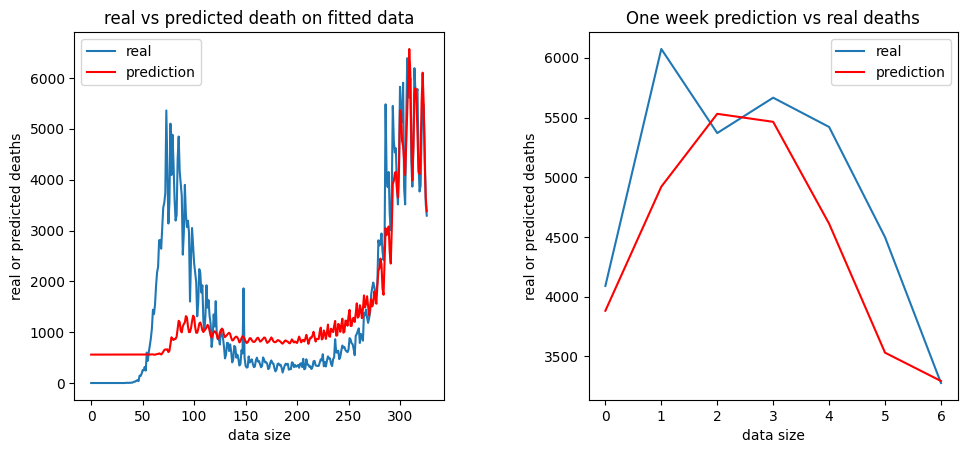

In [13]:
fig,ax=plt.subplots(1,2)
fig.tight_layout(pad=3.0)
fig.set_figwidth(11) 
ax[0].plot(ytofitreal,label='real');
ax[0].plot(yfitpred,'r',label='prediction');
ax[0].set_title('real vs predicted death on fitted data');
ax[0].set_ylabel('real or predicted deaths');
ax[0].set_xlabel('data size');
ax[0].legend();

ax[1].plot(deathst,label='real');
ax[1].plot(ypredicted,'r',label='prediction');
ax[1].set_title('One week prediction vs real deaths');
ax[1].set_ylabel('real or predicted deaths');
ax[1].set_xlabel('data size');
ax[1].legend();